This script will run the sample landscape image from the test set through the different generators for landscape to art domain.
The generator for the other half of the cycle will be used with a Monet and Shishkin image.

Google drive for the images and models will be linked. The images and models folder needs to be run in same directory as the notebook and network.py

In [0]:
%matplotlib notebook
%matplotlib inline
import os
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable
import torch.utils.data as td
import torchvision as tv
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import time
import random


In [0]:
import network as net #discriminators and generators from renjie in network.py 

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [0]:
def myimshow(image, ax=plt):
    image = image.to('cpu').numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1])
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1
    h = ax.imshow(image)
    ax.axis('off')
    return h

In [0]:
def getImg(path):
    img = Image.open(path).convert('RGB')
    transform = tv.transforms.Compose([
        tv.transforms.Resize((256,256),Image.LANCZOS),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])
    return transform(img)

In [0]:
train_landscape = getImg('images/27818670722.jpg').to(device)
test_landscape= getImg('images/47928055297.jpg').to(device)

## Paths

In [0]:
monet_base = 'models/cyclegan_monet_base'
monet_orig = 'models/cyclegan_monet_base_origdataset'
monet_lowercycle = 'models/cyclegan_monet_lowercycle'
ukiyoe = 'models/ukiyoe'
vangogh_base= 'models/vangogh_basic'
vangogh_noise= 'models/vangogh_noise'
vangogh_noise2= 'models/vangogh_noise2'
shishkin = 'models/Shishkin'
cezanne = 'models/Cezanne'
ident = 'models/Ident'
paths = [monet_base,monet_orig,monet_lowercycle,ukiyoe,vangogh_base,vangogh_noise,vangogh_noise2,shishkin,cezanne,ident]
names = ['monet_base','monet_orig','monet_lowercycle','ukiyoe','vangogh_base','vangogh_noise','vangogh_noise2','shishkin','cezanne','shishkin ident']

## Loading the Models

In [0]:
def LandscapeToPainting(path):
    Gyx = net.define_G()
    Gyx.load_state_dict(torch.load(path+'/gyx_saved_last_200.pt'))    
    return Gyx.to(device).eval()

In [0]:
def PaintingToLandscape(path):
    Gxy = net.define_G()
    Gxy.load_state_dict(torch.load(path+'/gxy_saved_last_200.pt'))    
    return Gxy.to(device).eval()

## Testing Landscape to Painting Models

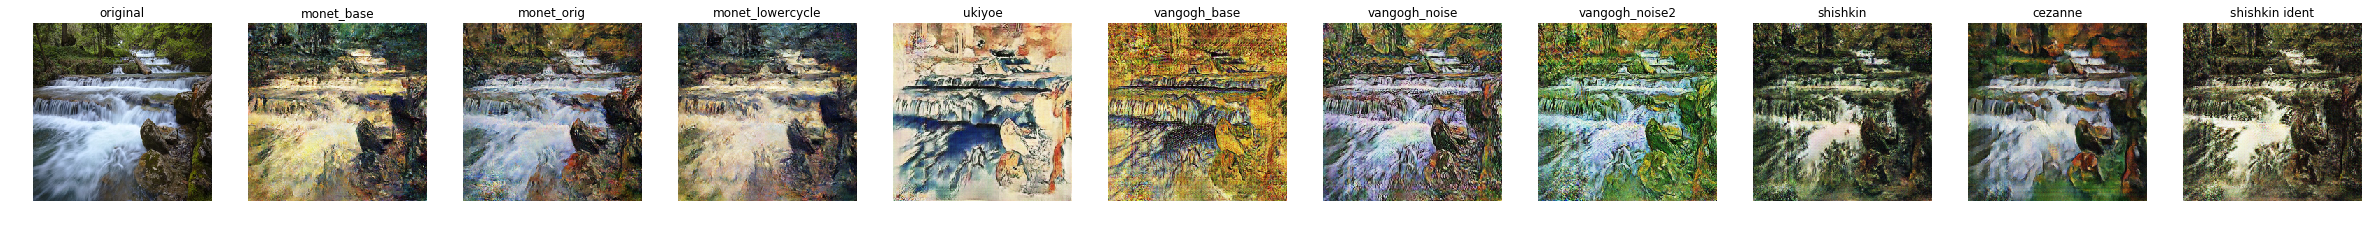

In [165]:
i = 1
test = test_landscape.unsqueeze(0)
f, axes = plt.subplots(1,len(paths)+1,figsize=(3*(len(paths)+1),2*(len(paths)+1)))
myimshow(test[0], ax=axes[0])
axes[0].set_title('original')
for path in paths:
    Gyx = LandscapeToPainting(path)
    with torch.no_grad():
        output = Gyx(test).detach()
        myimshow(output[0], ax=axes[i])
        axes[i].set_title(names[i-1])
        plt.tight_layout()
        f.canvas.draw()
    i+=1
f.savefig('testlandscape_demo_all.jpg', bbox_inches='tight')
    

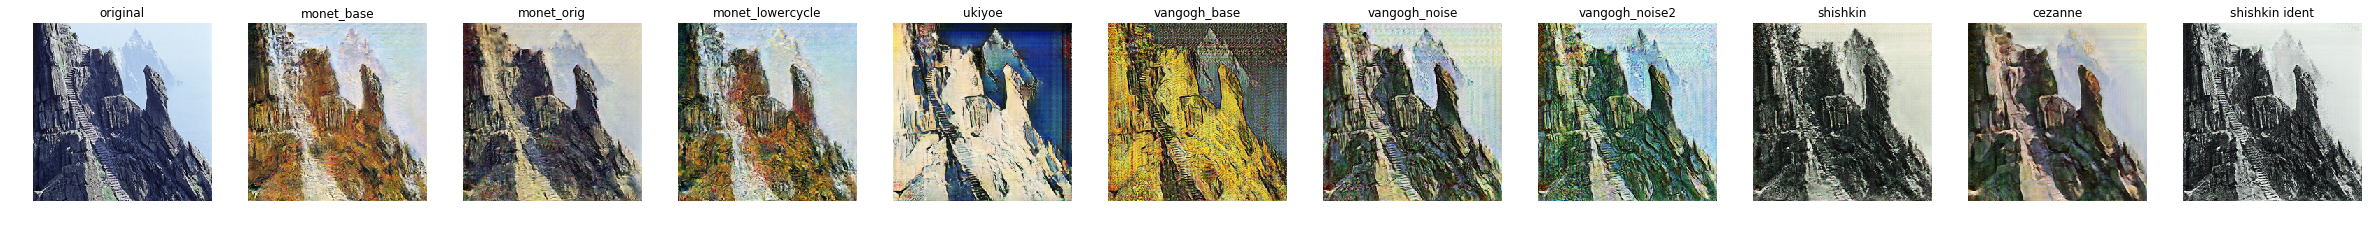

In [166]:
i = 1
test = train_landscape.unsqueeze(0)
f, axes = plt.subplots(1,len(paths)+1,figsize=(3*(len(paths)+1),2*(len(paths)+1)))
myimshow(train_landscape, ax=axes[0])
axes[0].set_title('original')
for path in paths:
    Gyx = LandscapeToPainting(path)
    with torch.no_grad():
        output = Gyx(test).detach()
        myimshow(output[0], ax=axes[i])
        axes[i].set_title(names[i-1])
        plt.tight_layout()
        f.canvas.draw()
    i+=1
f.savefig('trainlandscape_demo_all.jpg', bbox_inches='tight')

# Testing Painting to Landscape

## Monet with different dataset and lambda for cycle loss

In [0]:
monet_paths = [monet_base,monet_orig,monet_lowercycle]
monet_names = ['monet_base','monet_orig','monet_lowercycle']

In [0]:
monet_painting = getImg('images/00590.jpg').to(device).unsqueeze(0)

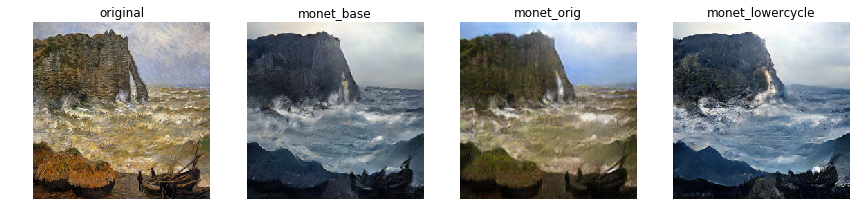

In [108]:
i = 1
f, axes = plt.subplots(1,len(monet_paths)+1,figsize=(3*(len(monet_paths)+1),2*(len(monet_paths)+1)))
myimshow(monet_painting[0], ax=axes[0])
axes[0].set_title('original')
for path in monet_paths:
    Gxy = PaintingToLandscape(path)
    with torch.no_grad():
        output = Gxy(monet_painting).detach()
        myimshow(output[0], ax=axes[i])
        axes[i].set_title(monet_names[i-1])
        plt.tight_layout()
        f.canvas.draw()
    i+=1
f.savefig('demo_monet_all.jpg', bbox_inches='tight')

## Shishkin with identity

In [0]:
shishkin_paths = [shishkin,ident]
shishkin_names = ['shishkin','shishkin_ident']

In [0]:
shishkin_painting = getImg('images/ivan-shishkin_deciduous-forest-1873.jpg').to(device).unsqueeze(0)

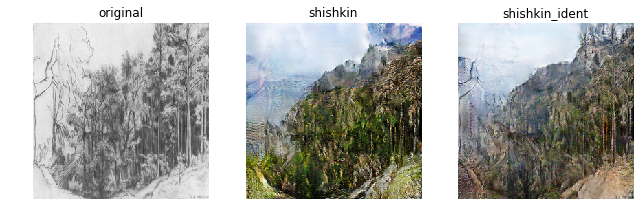

In [163]:
i = 1
f, axes = plt.subplots(1,len(shishkin_paths)+1,figsize=(3*(len(shishkin_paths)+1),2*(len(shishkin_paths)+1)))
myimshow(shishkin_painting[0], ax=axes[0])
axes[0].set_title('original')
for path in shishkin_paths:
    Gxy = PaintingToLandscape(path)
    with torch.no_grad():
        output = Gxy(shishkin_painting).detach()
        myimshow(output[0], ax=axes[i])
        axes[i].set_title(shishkin_names[i-1])
        plt.tight_layout()
        f.canvas.draw()
    i+=1
f.savefig('demo_shishkin_all.jpg', bbox_inches='tight')